In [148]:
import heapq
import json

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
with open("save/final/ed/lcl/full/0/feature.json") as f:
    ed = json.load(f)
with open("save/final/go/lcl/full/0/feature.json") as f:
    go = json.load(f)
with open("save/final/sst-5/lcl/full/0/feature.json") as f:
    sst = json.load(f)

In [137]:
def entropy(probs, top_k):
    top_k_scores = np.array(list(heapq.nlargest(top_k, scores) for scores in probs))
    normalized_top_k = scipy.special.softmax(top_k_scores, axis=1)
    return -(normalized_top_k * np.log2(normalized_top_k)).sum(axis=1).mean()

In [168]:
def entropies(probs):
    return np.array([entropy(probs, k) for k in range(2, len(probs[0]) + 1)])

In [177]:
ed_entropies = entropies(ed["pred_prob_1"])
go_entropies = entropies(go["pred_prob_1"])
sst_entropies = entropies(sst["pred_prob_1"])

Text(0.5, 1.0, 'SST-5')

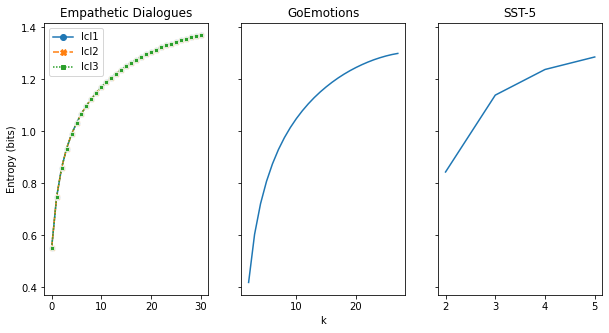

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

sns.lineplot(data=eds, ax=axes[0], markers=True)
axes[0].set_title("Empathetic Dialogues")
axes[0].set_ylabel("Entropy (bits)")

sns.lineplot(ax=axes[1], x=range(2,go_entropies.size+2), y=go_entropies)
axes[1].set_title("GoEmotions")
axes[1].set_xlabel("k")

sns.lineplot(ax=axes[2], x=range(2,sst_entropies.size+2), y=sst_entropies)
axes[2].set_title("SST-5")

In [201]:
eds = pd.DataFrame(np.array([ed_entropies, ed_entropies, ed_entropies]).T,
             columns=["lcl1", "lcl2", "lcl3"])